In [58]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# Создание двуслойной нейронной сети
# для обучения с помощью набора MNIST.
# пример из книги "Создаем нейронную сеть"
# (c) Tariq Rashid, 2016

In [60]:
import numpy
# библиотека scipy.special содержит сигмоиду - expit ()
import scipy.special
# библиотека для графического отображения массивов import 
import matplotlib.pyplot
# размещение графики в данном блокноте, а не в отдельном окне
%matplotlib inline

In [61]:
# определение класса нейронной сети 
class neuralNetwork:
    
    
    # инициализировать нейронную сеть
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # задать количество входных узлов и узлов в скрытом и выходном слоях 
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Матрицы весовых коэффициентов связей 
        # wih (между входным и скрытым слоями)и
        # who (между скрытым и выходным слоями).
        # Весовые коэффициенты связей между узлом i и узлом j
        # следующего слоя обозначены как  w_i_j
        # w11 w21
        # w12 w22 и т.д. 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # коэффициент скорости обучения
        self.lr = learningrate
        
        # использование сигмоиды в качестве функции активации 
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        # преобразование списка входных значений
        # в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # рассчитать входящие сигналы для скрытого слоя 
        hidden_inputs = numpy.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя 
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя 
        final_outputs = self.activation_function(final_inputs)
        
        # ошибки выходного слоя (целевое значение - фактическое значение)
        output_errors = targets - final_outputs
        # ошибки скрытого слоя - это ошибки output_errors
        # распределенные пропорционально весовым коэффициентам связей
        # и рекомбинированные на скрытых узлах 
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # обновить весовые коэффициенты для связей между скрытым и выходным слоями 
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # обновить весовые коэффициенты для связей между входным и скрытым слоями
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # опрос нейронной сети
    def query(self, inputs_list):
        # преобразовать список входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # рассчитать входящие сигналы для скрытого слоя 
        hidden_inputs = numpy.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя 
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя 
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [62]:
# количество входных, скрытых и выходных узлов 
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# коэффициент скорости обучения 
learning_rate = 0.1

# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [63]:
# загрузить в список тренировочный набор данных CSV-файла набора MNIST
training_data_file = open('/content/drive/MyDrive/ColabNotebooks/MNIST/mnist_train_100.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [64]:
# тренировка нейронной сети

# переменная epochs указывает, сколько раз тренировочный
# набор данных используется для тренировки сети 
epochs = 5

for e in range(epochs):
    # перебрать все записи в тренировочном наборе данных 
    for record in training_data_list:
        # получить список значений из записи, используя символы
        # запятой ',' в качестве разделителей 
        all_values = record.split(',')
        # масштабировать и сместить входные значения
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # создать целевые выходные значения (все равны 0.01, 
        # за исключением желаемого маркерного значения, равного 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] - целевое маркерное значение для данной записи 
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [65]:
# загрузить в список тестовый набор данных из CSV-файла набора MNIST
test_data_file = open("/content/drive/MyDrive/ColabNotebooks/MNIST/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [66]:
# тестирование нейронной сети

# журнал оценок работы сети, первоначально пустой
scorecard = []

# перебрать все записи в тестовом наборе данных 
for record in test_data_list:
    # получить список значений из записи, используя символы
    # запятой ','в качестве разделителей 
    all_values = record.split(',')
    # правильный ответ - первое значение 
    correct_label = int(all_values[0])
    # масштабировать и сместить входные значения
    inputs = (numpy.asfarray(allvalues[1:]) / 255.0 * 0.99) + 0.01
    # опрос сети
    outputs = n.query(inputs)
    # индекс наибольшего значения является маркерным значением 
    label = numpy.argmax(outputs)
    # добавить оценку ответа сети в конец списка 
    if (label == correct_label):
        # в случае правильного ответа сети добавить к списку значение 1
        scorecard.append(1)
    else:
        # в случае неправильного ответа сети добавить к списку значение 0 
        scorecard.append(0)
        pass
    
    pass

In [67]:
# рассчитать показатель эффективности в виде доли правильных ответов
scorecard_array = numpy.asarray(scorecard)
print(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
performance =  0.1


In [68]:
# загрузить в список тестовый набор данных из CSV-файла набора MNIST
test_data_file = open("/content/drive/MyDrive/ColabNotebooks/MNIST/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

7


array([[0.08705077],
       [0.03180837],
       [0.07933753],
       [0.09691925],
       [0.1136183 ],
       [0.03879324],
       [0.01503342],
       [0.73112296],
       [0.07624937],
       [0.09276358]])

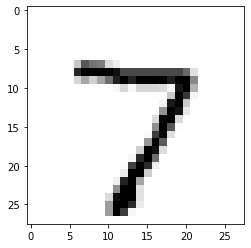

In [69]:
# тестирование нейронной сети
# получить первую тестовую запись 
all_values = test_data_list[0].split(',')
# вывести маркер
print(all_values[0])
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

In [70]:
# тестирование нейронной сети

# журнал оценок работы сети, первоначально пустой
scorecard = []
# перебрать все записи в тестовом наборе данных
for record in test_data_list:
  # получить список значений из записи, используя символы
  # запятой (',') в качестве разделителей
  all_values = record.split(',')
  # правильный ответ - первое значение
  correct_label = int(all_values[0])
  print(correct_label, "истинный маркер")
  # масштабировать и сместить входные значения
  inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  # опрос сети
  outputs = n.query(inputs)
  # индекс наибольшего значения является маркерным значением 
  label = numpy.argmax(outputs)
  print(label, "ответ сети")
  # присоединить оценку ответа сети к концу списка
  if (label == correct_label) :
    # в случае правильного ответа сети присоединить
    # к списку значение 1 
    scorecard.append(1)
  else:
    # в случае неправильного ответа сети присоединить
    # к списку значение 0 
    scorecard.append(0)
    pass
pass


7 истинный маркер
7 ответ сети
2 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
4 ответ сети
5 истинный маркер
4 ответ сети
9 истинный маркер
7 ответ сети


In [71]:
# рассчитать показатель эффективности в виде доли правильных ответов
scorecard_array = numpy.asarray(scorecard)
print(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
performance =  0.6


In [ ]:
test_data_list
